In [ ]:
#importing packages as needed
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [ ]:
#importing the dataset and reading it as dataframe
df = pd.read_csv('/content/movies.csv')


In [ ]:
#looking at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [ ]:
#gives % of msiing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [ ]:
#checking the datatypes
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [ ]:
#dropping the rows with missing values in columns
df = df.dropna()

In [ ]:
#drop the dupliacte rows
df.drop_duplicates()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [ ]:
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [ ]:
df.dtypes


name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
yearcorrect      int64
dtype: object

In [ ]:
#Coverting datatypes of Budget and Gross to int
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

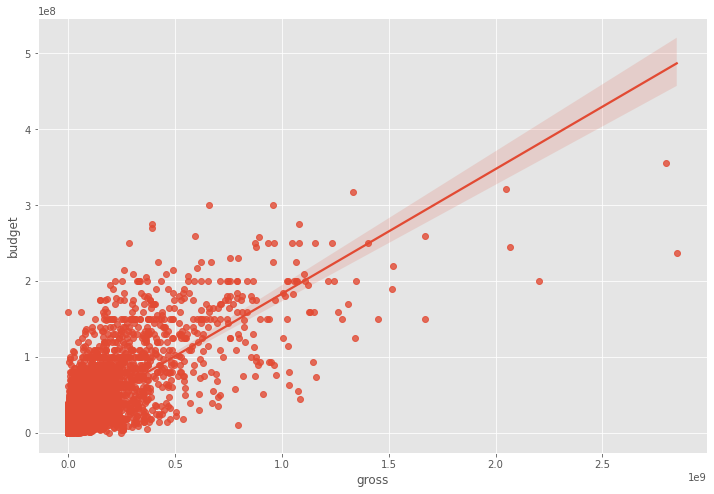

In [ ]:
sns.regplot(x="gross", y="budget", data=df)

In [ ]:
dfcor = df.corr()
dfcor

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


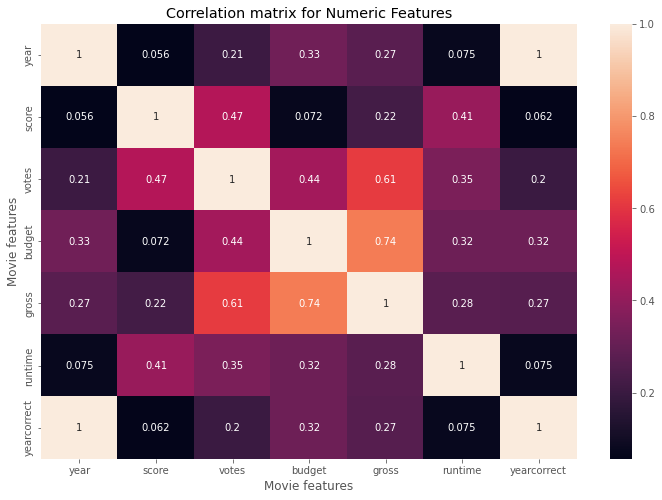

In [ ]:
#corelation matrix(It only gives the correlation between quantitative variables)
#we can see gross has highest correlation with budget
sns.heatmap(dfcor,annot=True)
plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [ ]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000.0,16,2390,1812,47,90000000,426505244,452,124.0,2020
7649,3556,4,0,2020,713,6.5,102000.0,852,2309,147,47,85000000,319715683,1108,99.0,2020
7650,1153,4,1,2020,904,5.6,53000.0,1809,2827,1470,47,175000000,245487753,1397,101.0,2020
7651,3978,4,1,2020,758,6.8,42000.0,294,2091,640,6,135000000,111105497,12,100.0,2020


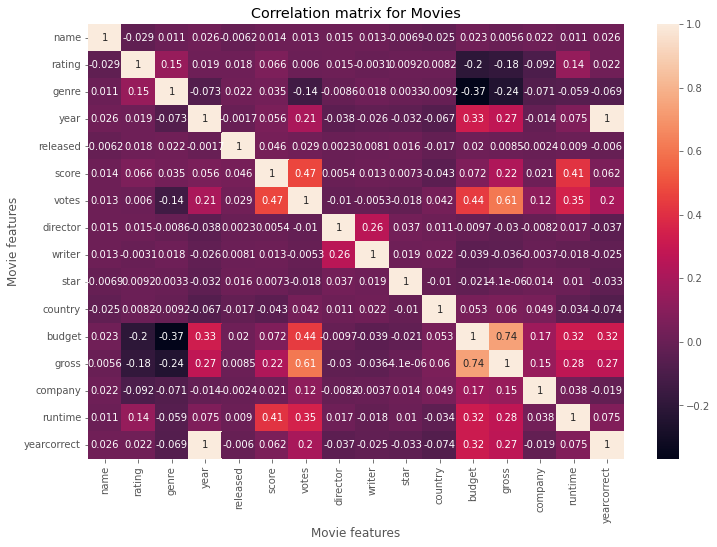

In [ ]:
#we can see votes has also highest correlation with gross but company doesn't have any correlation with gross revenue
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [ ]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
1426    54610959970
1397    51241105418
452     42356430218
1108    40021704691
1382    39542573303
1423    35833650748
1044    19612851164
983     15065592411
550     11873612858
551     11593807697
1367    10664679494
1001     8937010092
1309     8318570396
1134     7886344526
682      7243673721
Name: gross, dtype: int64